In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install  mlforecast
from mlforecast.utils import generate_daily_series
!pip install pyarrow
!pip install statsforecast
from statsforecast import StatsForecast
#importing for visualization process
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from math import sqrt
from sklearn.metrics import mean_squared_error
#import fbprophet
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.8/187.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 7.4 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.1.5-py3-none-any.whl size=157611 sha256=7d2f1ebaca91b3fa51569f3941e6063145753f6f432981d356df2497bcd64930
  Stored in directory: /root/.cache/pip/wheels/5d/dc/65/0a25b69011abd4e7a198ad0e4aa5399ae919082f6959deba31
Successfully built fugue-sql-antlr
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 635.0 kB/s eta

/opt/conda/lib/python3.7/site-packages/statsforecast/core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


![forecast](https://thumbs.dreamstime.com/z/man-holding-documents-demand-forecasting-name-108646291.jpg)

In [2]:
#reading ing_y data
ing_y=pd.read_csv('/kaggle/input/ing-y-data/ing_y.csv')

In [3]:
ing_y

,date,farm_id,ingredient_type,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,Relative_humidity,...,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,yield
0,2016-01-26 13:00:00,fid_59158,ing_y,5664.9463,11.0,220.0,9.0,1015.0,8.8,87.50,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,160.1870
1,2016-01-26 14:00:00,fid_59158,ing_y,5664.9463,11.0,220.0,9.0,1015.0,8.2,87.50,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,86.5844
2,2016-01-26 15:00:00,fid_59158,ing_y,5664.9463,11.0,230.0,9.0,1015.0,8.2,87.50,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,112.5130
3,2016-01-26 16:00:00,fid_59158,ing_y,5664.9463,11.0,230.0,10.0,1015.0,7.2,93.56,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,98.2064
4,2016-01-26 17:00:00,fid_59158,ing_y,5664.9463,11.0,230.0,10.0,1015.0,7.2,93.56,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,110.8460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719829,2016-12-31 23:00:00,fid_31738,ing_y,6132.8057,6.1,190.0,-6.7,1012.5,9.8,41.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
2719830,2016-12-31 23:00:00,fid_121246,ing_y,5785.9060,6.1,190.0,-6.7,1012.5,9.8,41.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,262.4600
2719831,2016-12-31 23:00:00,fid_77830,ing_y,5392.1830,6.1,190.0,-6.7,1012.5,9.8,41.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.4700
2719832,2016-12-31 23:00:00,fid_64331,ing_y,5320.9263,6.1,190.0,-6.7,1012.5,9.8,41.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191.0500


In [4]:
#converting date to datetime format for predictions
ing_y['date'] = pd.to_datetime(ing_y['date'])

In [5]:
#setting index according to the date and sorting the index
ing_y = ing_y.set_index(ing_y['date'])
ing_y = ing_y.sort_index()

In [6]:
# create train test partition
train = ing_y['2016-01-01 00:00:00':'2016-11-30 00:00:00']
test  = ing_y['2016-12-01':]
print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)

Train Dataset: (2478231, 43)
Test Dataset: (234115, 43)


In [7]:
train

,date,farm_id,ingredient_type,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,Relative_humidity,...,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,yield
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,2016-01-01,fid_92990,ing_y,5999.9546,-1.8,280.0,-3.2,1016.0,1.5,86.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,454.6300
2016-01-01,2016-01-01,fid_74943,ing_y,8842.6930,-8.3,250.0,-12.2,1023.5,4.1,72.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2198.0000
2016-01-01,2016-01-01,fid_22594,ing_y,12362.7880,-8.3,250.0,-12.2,1023.5,4.1,72.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3062.5000
2016-01-01,2016-01-01,fid_26200,ing_y,13254.6570,-8.3,250.0,-12.2,1023.5,4.1,72.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
2016-01-01,2016-01-01,fid_47171,ing_y,2568.5820,-8.3,250.0,-12.2,1023.5,4.1,72.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.7187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-30,2016-11-30,fid_34894,ing_y,8833.1240,10.0,200.0,8.9,1010.5,4.1,87.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.2627
2016-11-30,2016-11-30,fid_53351,ing_y,3837.0796,10.0,200.0,8.9,1010.5,4.1,87.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,542.2710
2016-11-30,2016-11-30,fid_53265,ing_y,3758.0193,10.0,200.0,8.9,1010.5,4.1,87.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.7192


In [8]:
#resampling train data according to the hours and interpolating with linear method
train = train.resample('H').mean()
train = train.interpolate(method='linear')
#resampling test data according to the hours and interpolating with linear method
test = test.resample('H').mean()
test= test.interpolate(method='linear')

By performing these operations on the datasets, we are preparing them for further analysis, such as time series forecasting or machine learning. Resampling and interpolation can help to reduce noise and make the data more consistent, which can improve the accuracy of the analysis.

**yield_Linear_Interpolation**

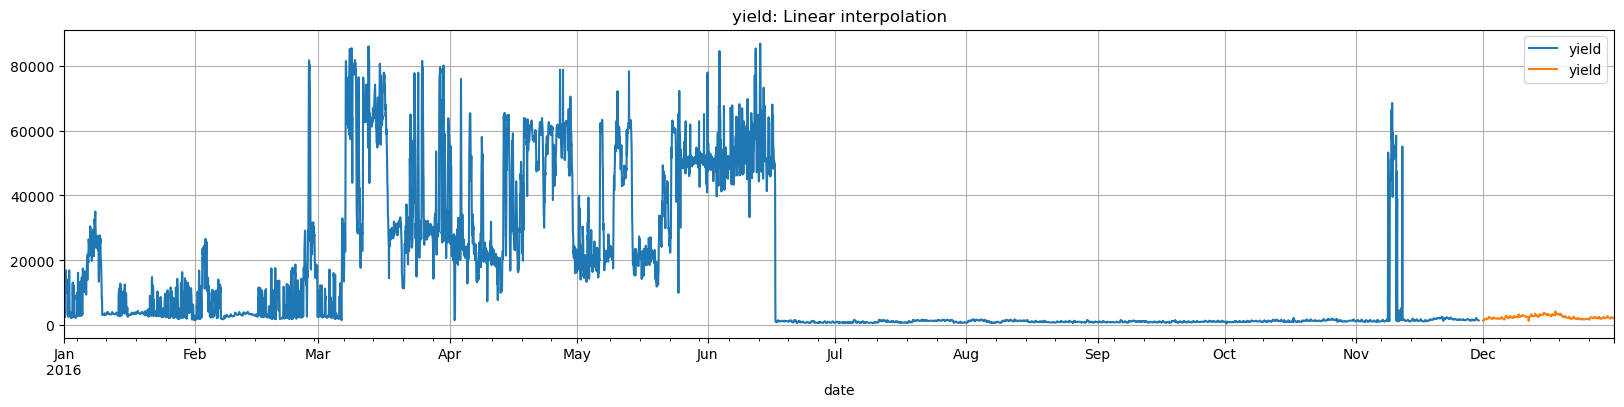

In [9]:
train = train.assign(yield_Linear_Interpolation=train['yield'].interpolate(method='linear'))
train[['yield']].plot(figsize=(20, 4))
test["yield"].plot()
plt.grid()
plt.legend(loc='best')
plt.title('yield: Linear interpolation')
plt.show(block=False)

In [10]:
#The rolling() method in Pandas is used to perform a rolling computation over a specified window size
movingaverage=train.rolling(window=12).mean()
movingstd=train.rolling(window=12).std()

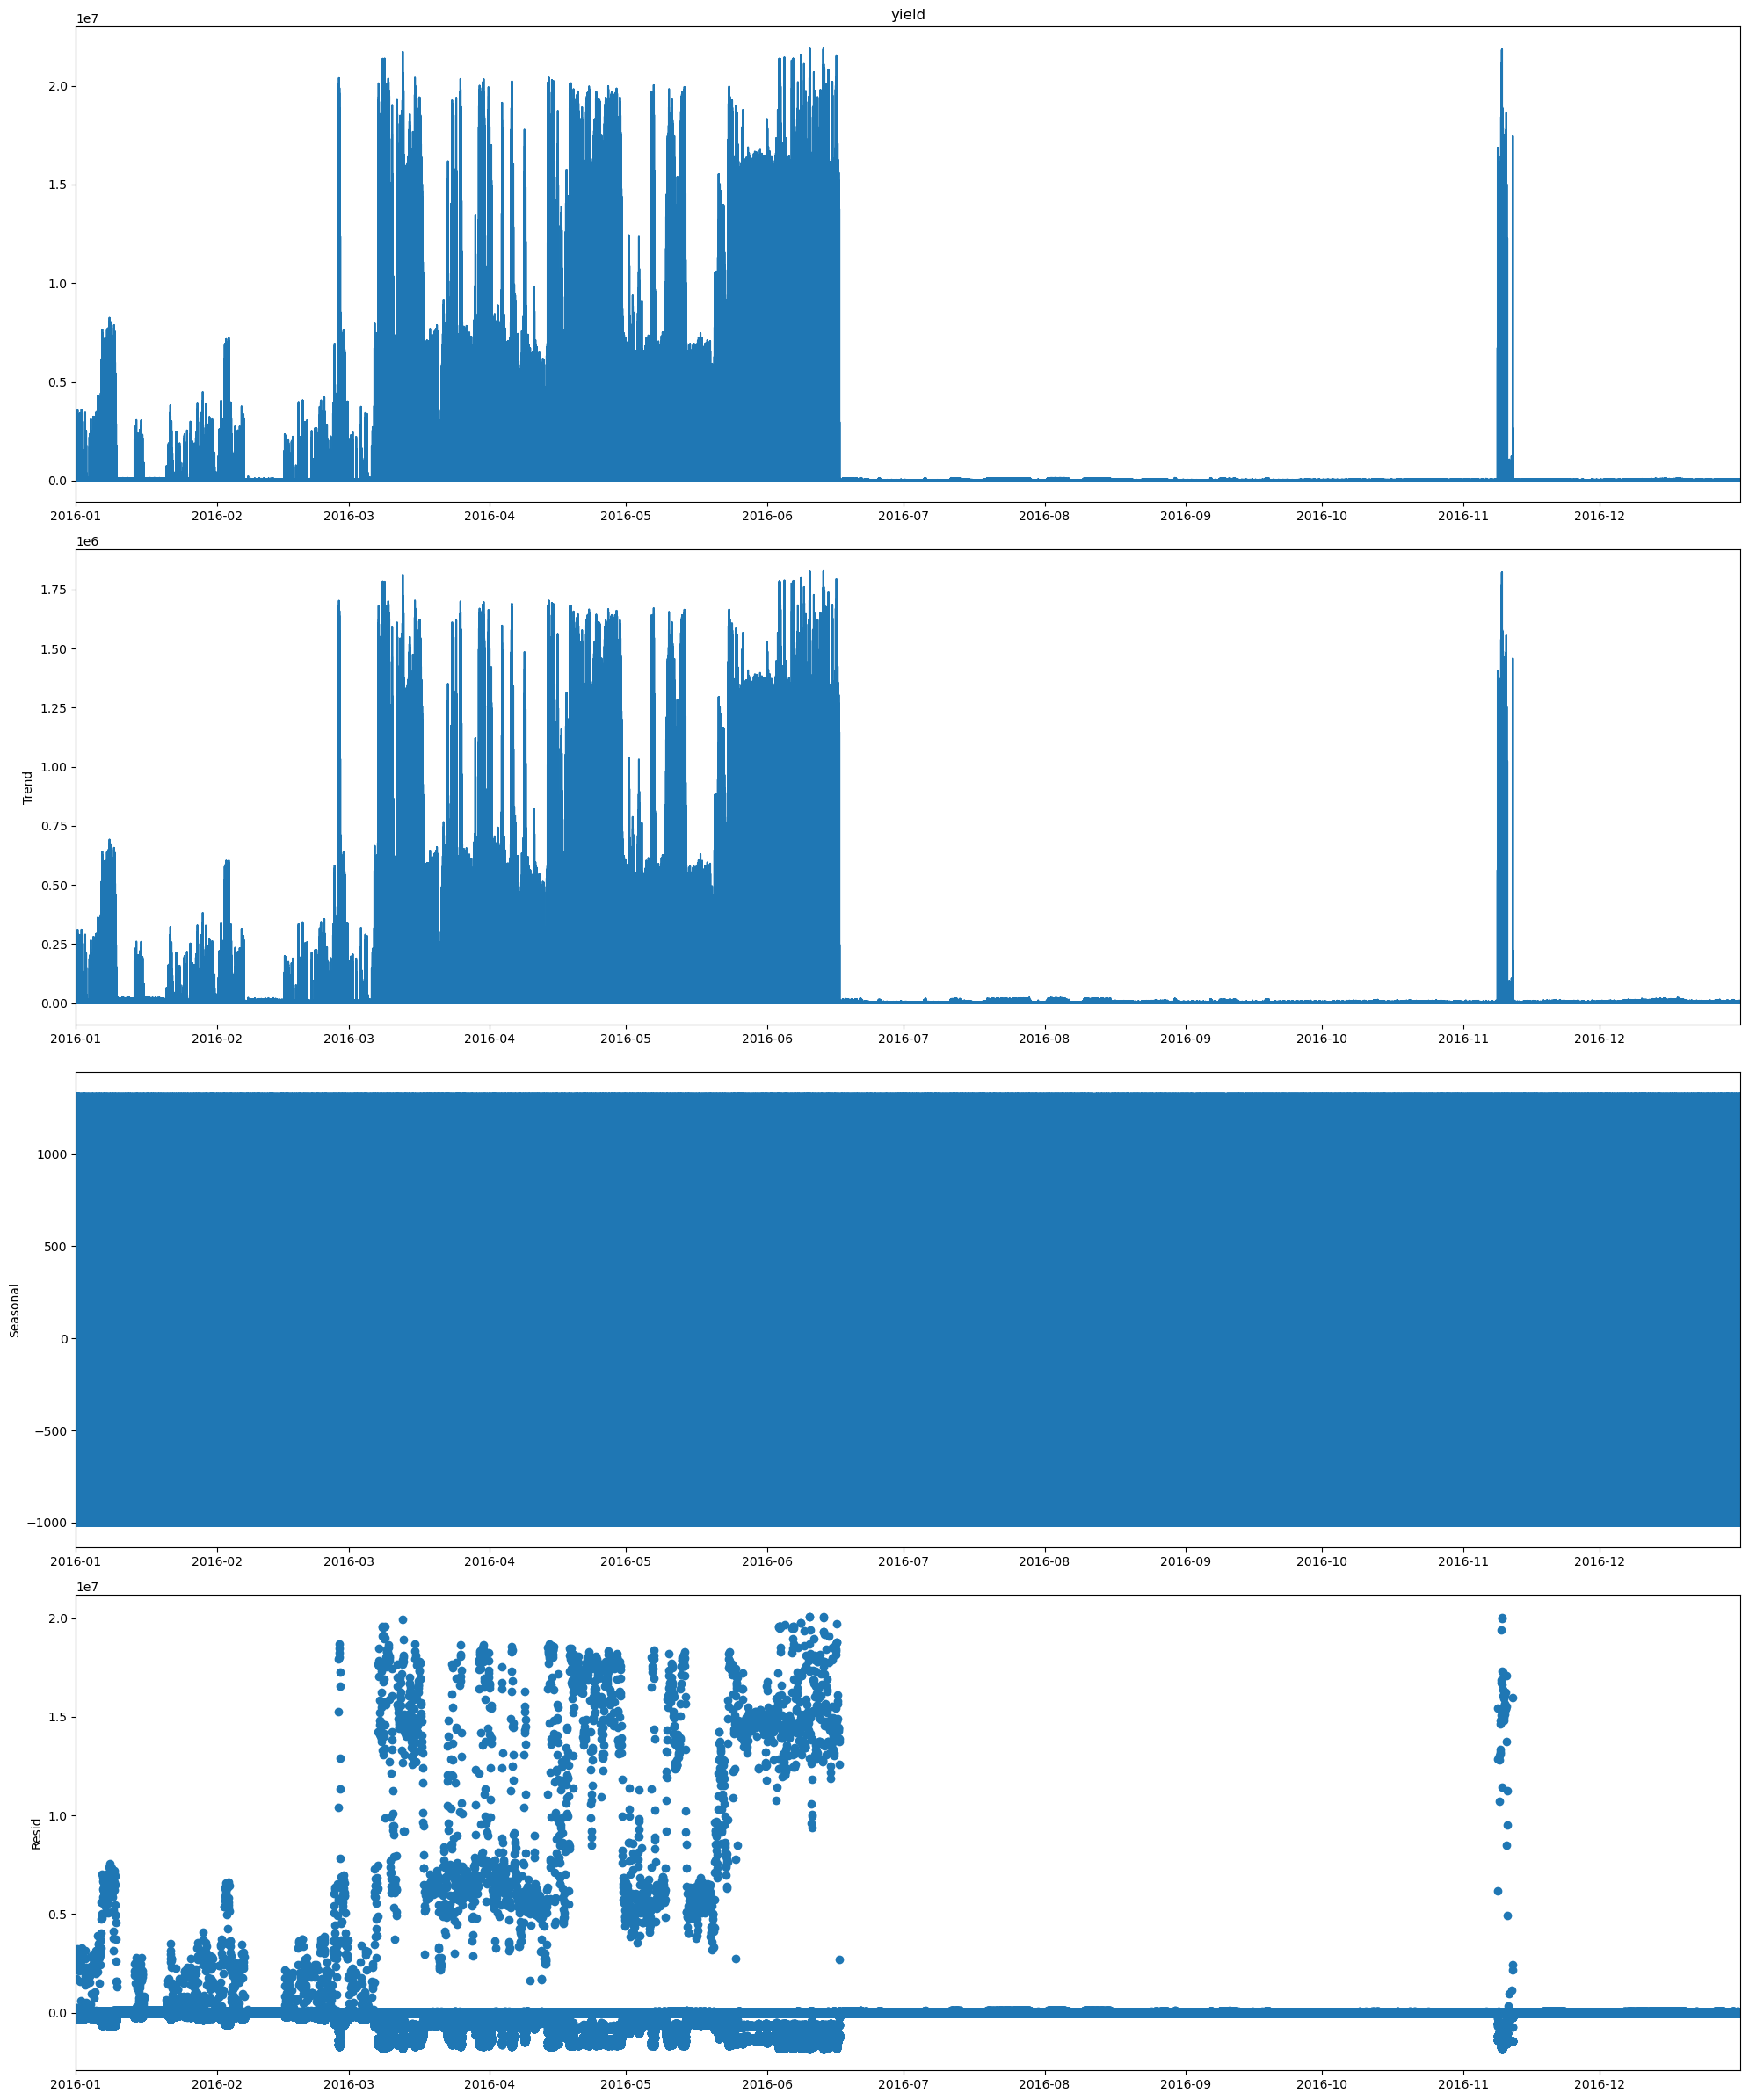

In [11]:
# plotting seasonal decompose of train data
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 20,24
decomposition = sm.tsa.seasonal_decompose(ing_y['yield'], model='additive',period =12) # additive seasonal index
fig = decomposition.plot()
plt.show()

Tts following a trend as we can see above and at a particular time the yield has been increased on october to november region.

**PERFORMING y_hat_avg_moving FOR TEST DATA**

Text(0.5, 1.0, 'Moving Average Forecast')

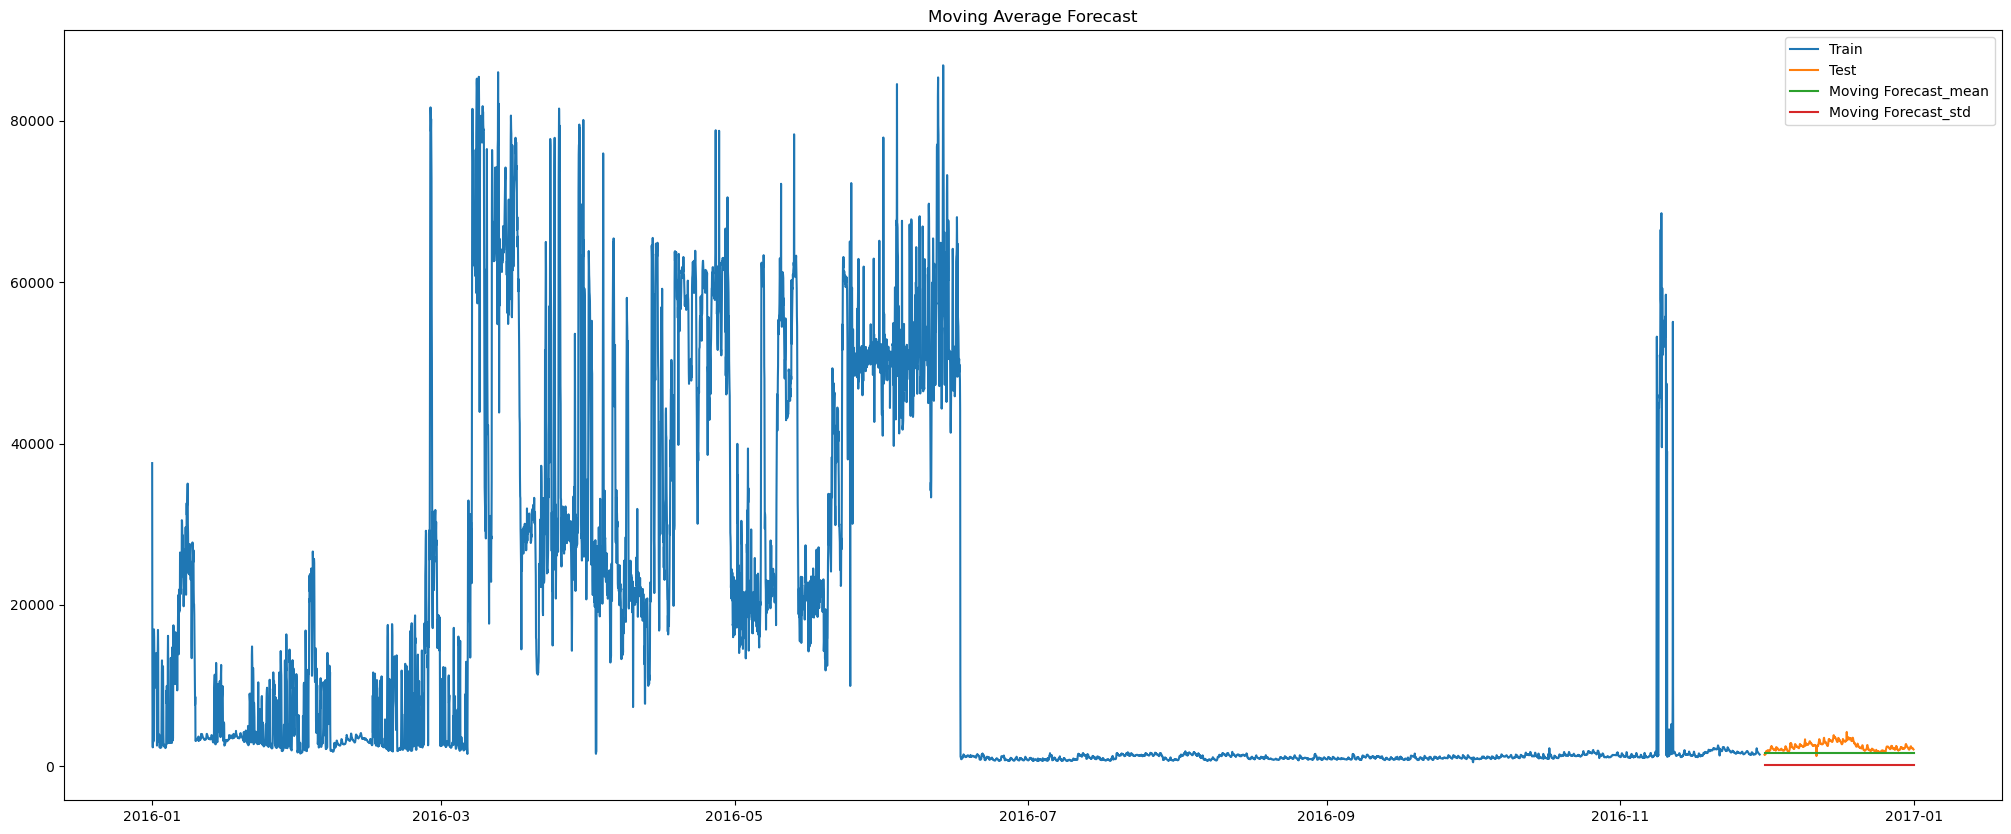

In [12]:
y_hat_avg_moving = test.copy()
y_hat_avg_moving['moving_avg_forcast_mean'] = train['yield'].rolling(window=12).mean().iloc[-1]
y_hat_avg_moving['moving_avg_forcast_std'] = train['yield'].rolling(window=12).std().iloc[-1]
plt.figure(figsize=(25,10))
plt.plot(train['yield'], label='Train')
plt.plot(test['yield'], label='Test')
plt.plot(y_hat_avg_moving['moving_avg_forcast_mean'], label='Moving Forecast_mean')
plt.plot(y_hat_avg_moving['moving_avg_forcast_std'], label='Moving Forecast_std')
plt.legend(loc='best')
plt.title('Moving Average Forecast')

In [13]:
y_hat_avg_moving

,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,Relative_humidity,farming_company_Del Monte Foods,farming_company_Dole Food Company,farming_company_Foster Farms,...,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,yield,moving_avg_forcast_mean,moving_avg_forcast_std
date,,,,,,,,,,,,,,,,,,,,,
2016-12-01 00:00:00,12914.899679,10.308000,144.307692,4.522769,1007.192308,3.069538,75.396677,0.036923,0.135385,0.030769,...,0.0,0.003077,0.0,0.0,0.273846,0.0,0.0,1431.276037,1605.490751,115.335212
2016-12-01 01:00:00,12890.721279,9.446626,143.588957,4.611963,1006.779141,3.981288,75.336442,0.036810,0.138037,0.030675,...,0.0,0.003067,0.0,0.0,0.273006,0.0,0.0,1460.704357,1605.490751,115.335212
2016-12-01 02:00:00,12890.721279,8.770552,141.349693,4.738957,1006.788344,3.344785,76.796012,0.036810,0.138037,0.030675,...,0.0,0.003067,0.0,0.0,0.273006,0.0,0.0,1448.960744,1605.490751,115.335212
2016-12-01 03:00:00,12890.721279,8.566871,140.552147,5.103067,1006.262270,3.635276,81.355644,0.036810,0.138037,0.030675,...,0.0,0.003067,0.0,0.0,0.273006,0.0,0.0,1440.076483,1605.490751,115.335212
2016-12-01 04:00:00,12890.721279,8.251227,141.073620,5.187117,1005.697853,3.667791,82.354847,0.036810,0.138037,0.030675,...,0.0,0.003067,0.0,0.0,0.273006,0.0,0.0,1440.119303,1605.490751,115.335212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,12871.300109,6.780428,212.813456,-2.235474,1011.873089,4.623853,54.875902,0.036697,0.134557,0.030581,...,0.0,0.003058,0.0,0.0,0.269113,0.0,0.0,2224.738710,1605.490751,115.335212
2016-12-31 20:00:00,12879.178113,6.476147,161.253823,-2.322324,1009.876147,5.223853,56.455443,0.036697,0.137615,0.030581,...,0.0,0.003058,0.0,0.0,0.272171,0.0,0.0,2212.206362,1605.490751,115.335212
2016-12-31 21:00:00,12871.300109,6.892966,209.388379,-2.240367,1009.813456,4.620795,56.059725,0.036697,0.134557,0.030581,...,0.0,0.003058,0.0,0.0,0.269113,0.0,0.0,2171.285324,1605.490751,115.335212


In [14]:
#CHECKING RMSE VALUES OF MOVING AVERAGE
rms_avg_rolling = sqrt(mean_squared_error(test['yield'],y_hat_avg_moving['moving_avg_forcast_mean']))
print('ROLLING AVERAGE',rms_avg_rolling)

ROLLING AVERAGE 989.3655048686574


**ExponentialSmoothing**

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


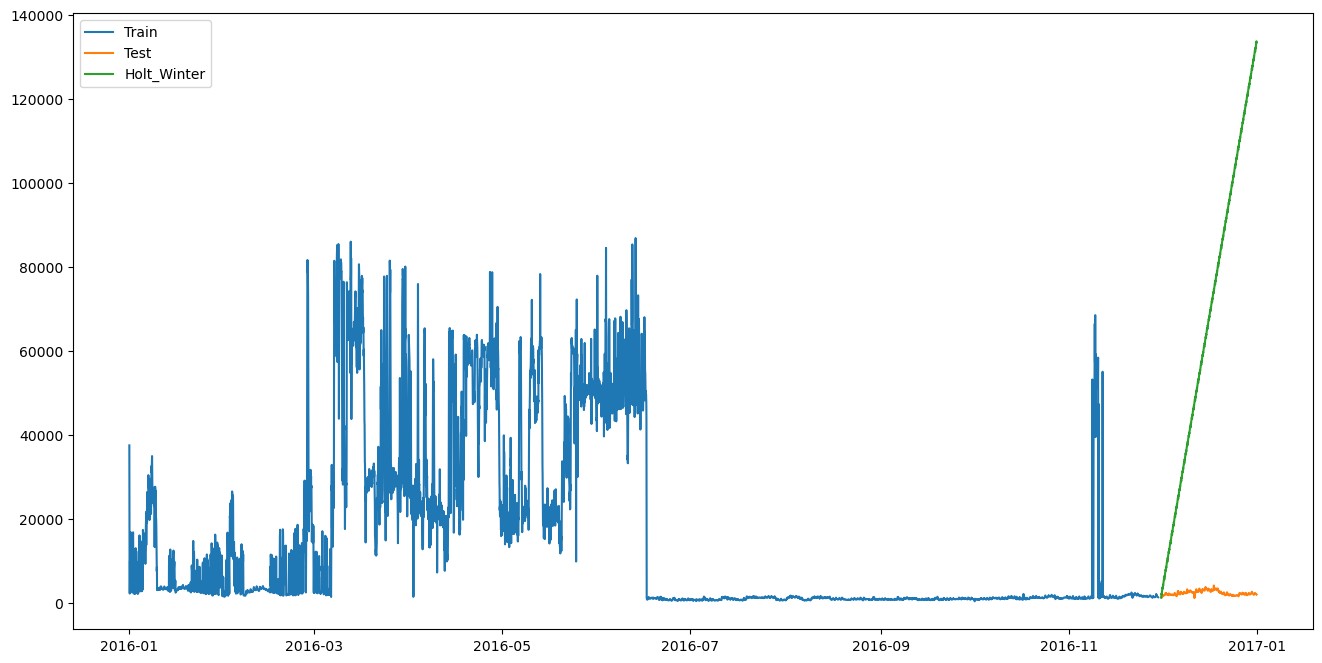

In [15]:

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['yield']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['yield'], label='Train')
plt.plot(test['yield'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [16]:
rmse = sqrt(mean_squared_error(test['yield'], y_hat_avg.Holt_Winter))
print(rmse)

75578.74986000475


In [17]:
 y_hat_avg.Holt_Winter

date
2016-12-01 00:00:00      1356.320475
2016-12-01 01:00:00      1550.181054
2016-12-01 02:00:00      2299.718286
2016-12-01 03:00:00      2072.583417
2016-12-01 04:00:00      2363.329304
                           ...      
2016-12-31 19:00:00    133133.252207
2016-12-31 20:00:00    133389.682428
2016-12-31 21:00:00    133556.755347
2016-12-31 22:00:00    133713.331066
2016-12-31 23:00:00    133439.312218
Freq: H, Name: Holt_Winter, Length: 744, dtype: float64

The rolling average for our model is 19.988482627808388. This prediction seems to be very consistent in hitting the average of the future sales. This naive model definitely looks like a solid model, however, it is not the best one.so we are considering moving average as a best model

**TEST DATA**

In [18]:
#reading the test data
ing_y_test= pd.read_csv("/kaggle/input/ing-y-data/ing_y_test.csv")

In [19]:
#checking the value counts of ing_y_test
ing_y_test['farm_id'].value_counts()

fid_26064     17518
fid_122174    17518
fid_63700     17508
fid_59158     17265
fid_68690      8759
              ...  
fid_71961      8246
fid_93081      8246
fid_54695      8246
fid_43998      8246
fid_80293      8246
Name: farm_id, Length: 324, dtype: int64

In [20]:
#checking the value counts of ing_y
ing_y['farm_id'].value_counts()

fid_122174    17566
fid_26064     17563
fid_63700     17553
fid_59158     13423
fid_45834      8783
              ...  
fid_116221     4314
fid_69851      3377
fid_76288      2797
fid_60652      2656
fid_115504      604
Name: farm_id, Length: 324, dtype: int64

as both the farm_id unique values length is same going further for forcasting

**PREPROCESSING ing_y_TEST DATA**

In [21]:
ing_y_test['date'] = pd.to_datetime(ing_y_test['date'])

In [22]:
ing_y_test = ing_y_test.set_index(ing_y_test['date'])
ing_y_test = ing_y_test.sort_index()

Text(0.5, 1.0, 'Moving Average Forecast')

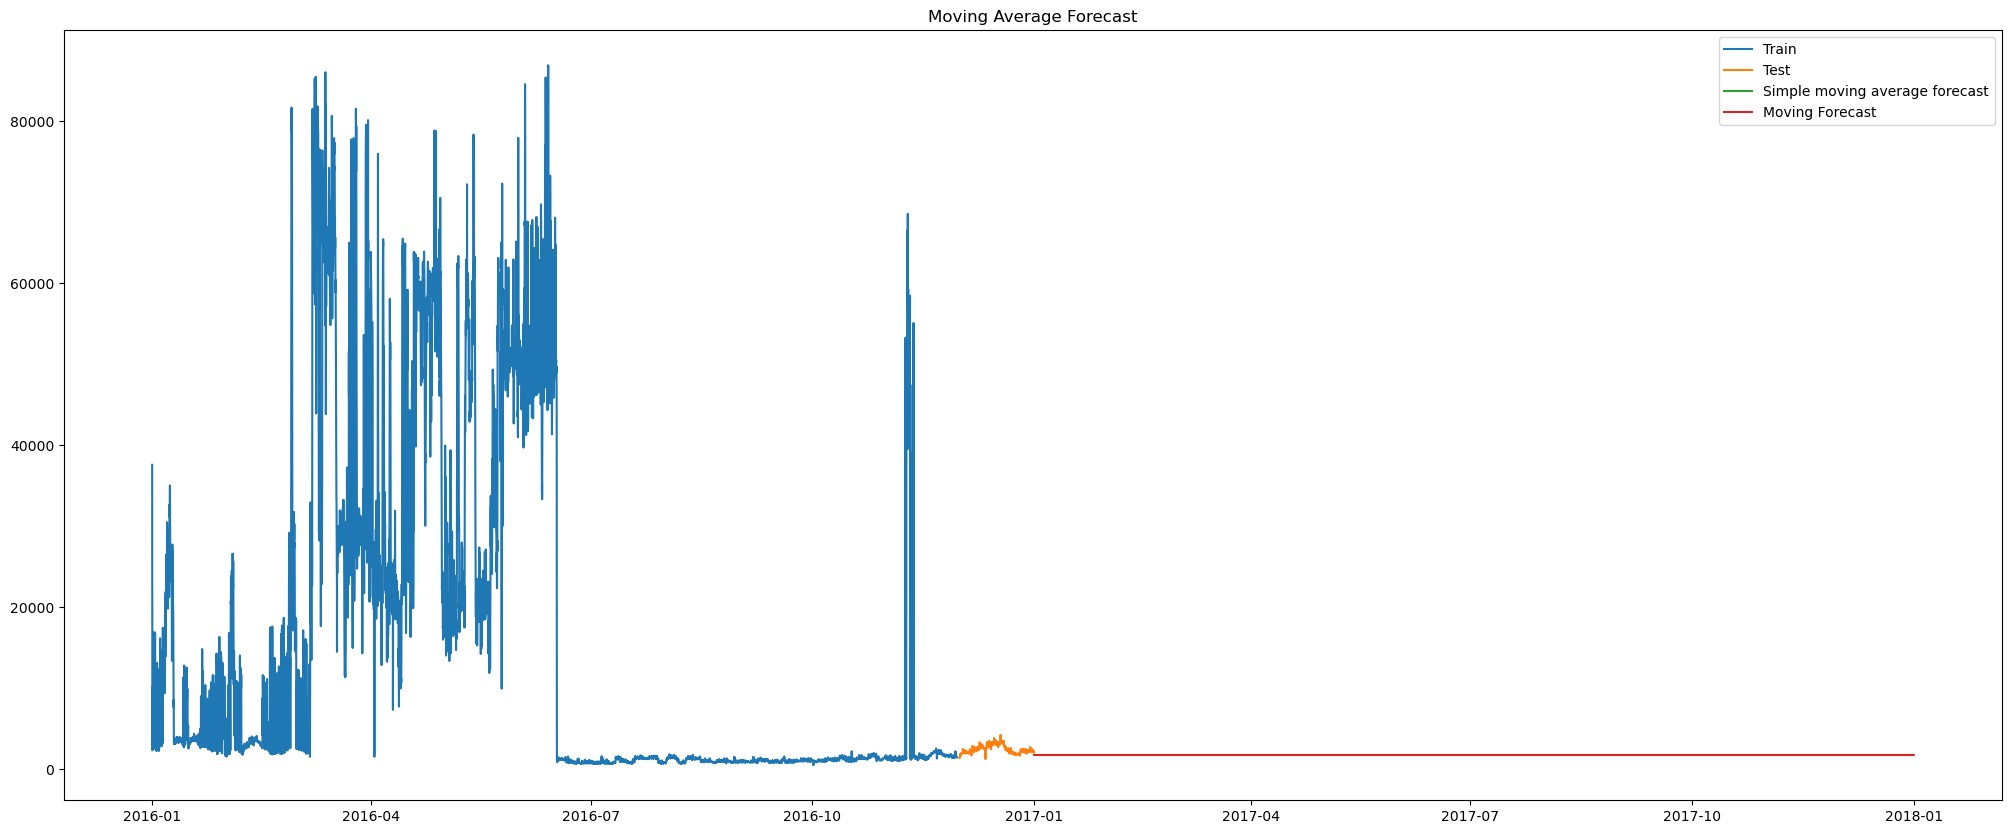

In [23]:
y_hat_avg_moving_pred = ing_y_test.copy()
y_hat_avg_moving_pred['moving_avg_forcast'] = train['yield'].rolling(200).mean().iloc[-1]
plt.figure(figsize=(25,10))
plt.plot(train['yield'], label='Train')
plt.plot(test['yield'], label='Test')
plt.plot(y_hat_avg_moving_pred['moving_avg_forcast'], label='Simple moving average forecast')
plt.plot(y_hat_avg_moving_pred['moving_avg_forcast'], label='Moving Forecast')
plt.legend(loc='best')
plt.title('Moving Average Forecast')

In [24]:
y_hat_avg_moving_pred

,date,farm_id,ingredient_type,id,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,...,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,moving_avg_forcast
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_26064,ing_y,26740516,425.58865,8.9,190.0,-5.6,1015.5,8.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1760.954838
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_55290,ing_y,26740581,11307.59600,-5.6,230.0,-10.6,1010.0,3.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1760.954838
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_21908,ing_y,26740579,14592.27400,-5.6,230.0,-10.6,1010.0,3.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1760.954838
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_71811,ing_y,26740577,12033.91100,-5.6,230.0,-10.6,1010.0,3.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1760.954838
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_109954,ing_y,26740574,6929.07700,-5.6,230.0,-10.6,1010.0,3.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1760.954838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_122133,ing_y,29446866,8483.53000,-21.7,270.0,-27.2,1043.0,3.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1760.954838
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_56367,ing_y,29446863,24942.59800,-21.7,270.0,-27.2,1043.0,3.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1760.954838
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_34005,ing_y,29446855,18156.68400,-21.7,270.0,-27.2,1043.0,3.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1760.954838


In [25]:
predictions = y_hat_avg_moving_pred[['date','farm_id' ,'moving_avg_forcast']]

In [26]:
predictions

,date,farm_id,moving_avg_forcast
date,,,
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_26064,1760.954838
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_55290,1760.954838
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_21908,1760.954838
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_71811,1760.954838
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_109954,1760.954838
...,...,...,...
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_122133,1760.954838
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_56367,1760.954838
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_34005,1760.954838


In [27]:
predictions_ing_y = pd.DataFrame(predictions)

In [28]:
predictions_ing_y.to_csv('predictions_ing_y.csv', index=False)

In [29]:
# convert the data with respect to the month
predictions_ing_y['date'] = pd.to_datetime(predictions_ing_y['date'])
predictions_ing_y['month'] = predictions_ing_y['date'].dt.month
monthly_data_predictions_ing_y= predictions_ing_y.groupby('month').agg({'moving_avg_forcast': 'sum'})

# print the monthly data
print(monthly_data_predictions_ing_y)

       moving_avg_forcast
month                    
1            4.269417e+08
2            3.861087e+08
3            4.265596e+08
4            4.136976e+08
5            4.282237e+08
6            4.065745e+08
7            4.289439e+08
8            4.288119e+08
9            4.147137e+08
10           4.289299e+08
11           4.156540e+08
12           4.124262e+08


In [30]:
monthly_data_predictions_ing_y

,moving_avg_forcast
month,
1,4.269417e+08
2,3.861087e+08
3,4.265596e+08
4,4.136976e+08
5,4.282237e+08
6,4.065745e+08
7,4.289439e+08
8,4.288119e+08
9,4.147137e+08


In [31]:
# Convert the column to float
monthly_data_predictions_ing_y['moving_avg_forcast'] = monthly_data_predictions_ing_y['moving_avg_forcast'].astype(int)

In [32]:
monthly_data_predictions_ing_y.reset_index()

,month,moving_avg_forcast
0,1,426941739
1,2,386108718
2,3,426559612
3,4,413697598
4,5,428223714
5,6,406574535
6,7,428943945
7,8,428811873
8,9,414713669
9,10,428929857
